In [1]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
100% 1.98G/1.98G [00:19<00:00, 189MB/s]
100% 1.98G/1.98G [00:19<00:00, 111MB/s]


In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [38]:
import tensorflow_datasets as tfds

In [ ]:
#defining the training set

In [39]:
train_ds=keras.utils.image_dataset_from_directory(
  directory='/content/train',
    validation_split=0.2,
    subset= 'training',
    seed = 123,
    batch_size=32,
    image_size=(256,256),
)

Found 3115 files belonging to 36 classes.
Using 2492 files for training.


In [ ]:
#validaiton data

In [45]:
val_ds=keras.utils.image_dataset_from_directory(
  directory='/content/test',
  labels='inferred',
  label_mode='int',
  seed=123,
  batch_size=32,
  image_size=(256,256)
)

Found 359 files belonging to 36 classes.


In [46]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().shuffle(buffer_size=32).prefetch(buffer_size=AUTOTUNE)

In [42]:
class_names = train_ds.class_names
print(class_names)

['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


In [ ]:
#plotting images of fruits and vegetables

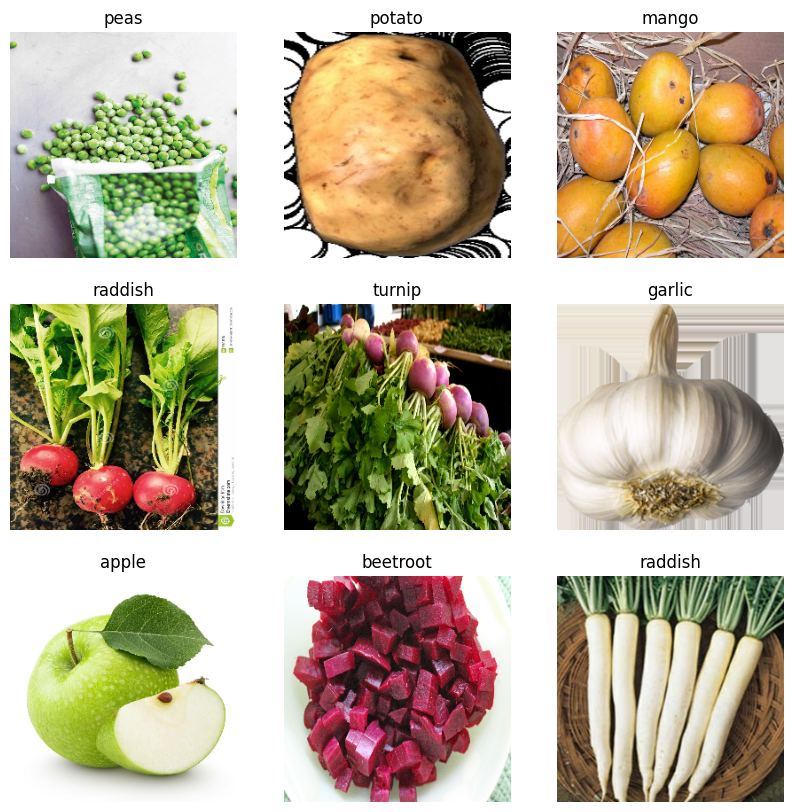

In [43]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [48]:
num_classes = len(class_names)

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.5),
])

model = Sequential([
  layers.Rescaling(1./255, input_shape=(256, 256, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#using optimzer as adam

In [49]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_5 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 128, 128, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 sequential_2 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 128, 128, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                 

In [ ]:
#choosing epohcs of 15

In [50]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
78/78 [==============================] - 274s 3s/step - loss: 3.3250 - accuracy: 0.0895 - val_loss: 2.7014 - val_accuracy: 0.2173
Epoch 2/15
78/78 [==============================] - 210s 3s/step - loss: 2.6798 - accuracy: 0.2095 - val_loss: 2.3194 - val_accuracy: 0.3120
Epoch 3/15
78/78 [==============================] - 206s 3s/step - loss: 2.4396 - accuracy: 0.2548 - val_loss: 1.9705 - val_accuracy: 0.3955
Epoch 4/15
78/78 [==============================] - 202s 3s/step - loss: 2.2919 - accuracy: 0.3010 - val_loss: 1.8907 - val_accuracy: 0.3900
Epoch 5/15
78/78 [==============================] - 208s 3s/step - loss: 2.1930 - accuracy: 0.3278 - val_loss: 1.8193 - val_accuracy: 0.4624
Epoch 6/15
78/78 [==============================] - 205s 3s/step - loss: 2.1039 - accuracy: 0.3319 - val_loss: 1.7009 - val_accuracy: 0.4234
Epoch 7/15
78/78 [==============================] - 204s 3s/step - loss: 2.0373 - accuracy: 0.3716 - val_loss: 1.6374 - val_accuracy: 0.4791
Epoch 8/15
78

In [51]:
test_url ="/content/test"
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_url,
    seed = 123,
    image_size=(256,256),
    shuffle=False
)

Found 359 files belonging to 36 classes.


In [52]:
test_images, test_labels = tuple(zip(*test_ds))

predictions = model.predict(test_ds)
score = tf.nn.softmax(predictions)

12/12 [==============================] - 18s 1s/step


In [53]:
results = model.evaluate(test_ds)
print("Test loss, test acc:", results)

12/12 [==============================] - 21s 2s/step - loss: 1.3730 - accuracy: 0.5543
Test loss, test acc: [1.3730188608169556, 0.5543175339698792]


In [54]:
y_test = np.concatenate(test_labels)
y_pred = np.array([np.argmax(s) for s in score])

print(classification_report(y_test, y_pred, target_names=class_names))

               precision    recall  f1-score   support

        apple       0.38      0.30      0.33        10
       banana       0.67      0.67      0.67         9
     beetroot       0.64      0.90      0.75        10
  bell pepper       0.50      0.50      0.50        10
      cabbage       0.89      0.80      0.84        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.90      0.90      0.90        10
  cauliflower       1.00      0.50      0.67        10
chilli pepper       0.21      0.30      0.25        10
         corn       0.40      0.20      0.27        10
     cucumber       0.75      0.60      0.67        10
     eggplant       0.86      0.60      0.71        10
       garlic       0.62      1.00      0.77        10
       ginger       0.40      0.20      0.27        10
       grapes       0.70      0.70      0.70        10
     jalepeno       0.44      0.40      0.42        10
         kiwi       0.57      0.80      0.67        10
        l

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
#importing libraries

In [57]:
import cv2
import matplotlib.pyplot as plt

In [66]:
image_batch, label_batch = next(iter(train_ds))
prediction_batch = model.predict(image_batch)
score_batch = tf.nn.softmax(prediction_batch)

1/1 [==============================] - 1s 965ms/step


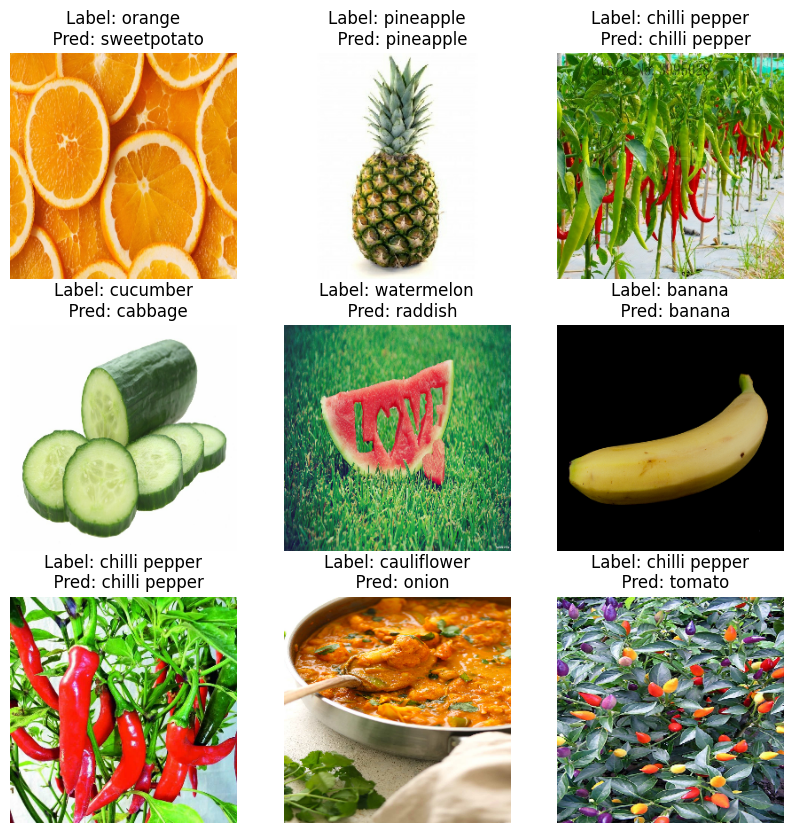

In [67]:
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title( "Label: " + class_names[label] + "\n  Pred: " + class_names[np.argmax(score_batch[i])])
  plt.axis("off")

In [ ]:
#accuacy can be improved by fine tuning